# Data Analysis of Euro Soccer Games

I would like to preface this analysis by saying that I'm expiriementing with the use of SQL in python, and in doing so am following along the work of **'Dima Rudov'**, who posted his Notebook analysis on Kaggle in March of 2022. 

The goal for my project is to copy along the analysis Dima exhibited (Part A), and then add on some of my own analysis to build off of what he has presented(Part B). 

In [29]:
## -- READ:

**Scroll down to Part B for my personal analysis**

In [27]:
##

## Part A: Follow Along Analysis 

The data in this project is of European Soccer matches that have occured since 2008 up to 2016. I will follow along the initial analysis path that was taken by Dima, then subsequently head into my own analysis afterward. 

#### Loading the data, and connecting SQL to Python:

First we need to install the libraries neccessary for our analysis:

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Next we need to go through the proper set up of connecting SQL to python, here is the pathway to our database:

In [2]:
database = "/Users/adamniebylski/Desktop/database.sqlite"

In [3]:
conn = sqlite3.connect(database)

Now lets check to see if our database is running properly:

In [4]:
tables = pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type = 'table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


Now that we can confirm that the database is operational, we will continue on to do the analysis that Dima carried out in his notebook:

#### List of Countries:

Basic query to find all the values in the country table:

In [5]:
countries = pd.read_sql(
"""SELECT *
FROM country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


The next step is implimenting a 'JOIN' in order to bring tables together for further analysis:

In [6]:
leagues = pd.read_sql("""
SELECT *
FROM League
JOIN Country ON Country.id = League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


#### Using Order by:

Next we will be demonstrating how to use Order by:

In [7]:
teams = pd.read_sql("""
SELECT * 
FROM Team
ORDER BY team_long_name
LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


An example of some mroe detailed analysis with 'ORDER BY':

In [8]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


Further Analysis: This will be taking the average teams scores grouped by the country name, league name, and season

In [44]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                LIMIT 10
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


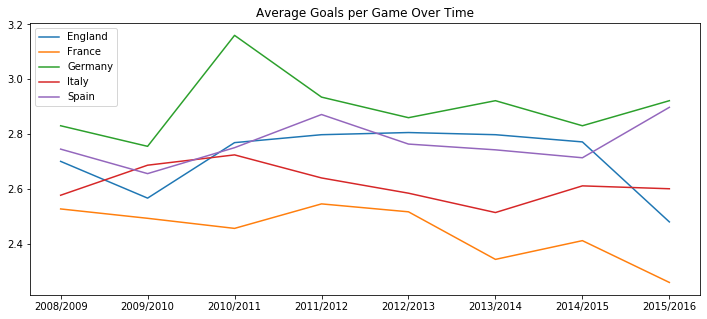

In [10]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

## Part B: My Personal Analysis

This will be the part of the analysis where my own personal exploration will take place. We will start by analysing the query previous to the graph, in order to set up a window function where we find the rolling average of the points earned by each game. This will give us an idea of how the averages change over time:

We will start by keeping a lot of the previous query in order to add onto it:

In [43]:
rolling_avg_by_season = pd.read_sql("""SELECT Match.id, Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        sum(avg(home_team_goal)) over (partition by Country.name order by match.id) AS roll_avg_home_team_scors, 
                                        sum(avg(away_team_goal)) over (partition by Country.name order by match.id) AS roll_avg_away_team_goals, 
                                        sum(avg(home_team_goal-away_team_goal)) over (partition by Country.name order by match.id) AS roll_avg_goal_dif, 
                                        sum(avg(home_team_goal+away_team_goal)) over (partition by Country.name order by match.id) AS roll_avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY season, Country.name, League.name
                                HAVING count(distinct stage) > 10
                                ORDER BY match.id asc, season asc, Country.name, League.name
                                LIMIT 10
                                ;""", conn)
rolling_avg_by_season

,id,country_name,league_name,season,number_of_stages,number_of_teams,roll_avg_home_team_scors,roll_avg_away_team_goals,roll_avg_goal_dif,roll_avg_goals,total_goals
0,1729,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
1,2109,England,England Premier League,2009/2010,38,20,3.097368,2.152632,0.944737,5.250000,1053
2,2489,England,England Premier League,2010/2011,38,20,4.721053,3.326316,1.394737,8.047368,1063
3,2869,England,England Premier League,2011/2012,38,20,6.310526,4.542105,1.768421,10.852632,1066
4,3249,England,England Premier League,2012/2013,38,20,7.868421,5.781579,2.086842,13.650000,1063
5,3629,England,England Premier League,2013/2014,38,20,9.442105,6.976316,2.465789,16.418421,1052
6,4009,England,England Premier League,2014/2015,38,20,10.915789,8.068421,2.847368,18.984211,975
7,4389,England,England Premier League,2015/2016,38,20,12.407895,9.276316,3.131579,21.684211,1026
8,4769,France,France Ligue 1,2008/2009,38,20,1.286842,0.971053,0.315789,2.257895,858
9,5149,France,France Ligue 1,2009/2010,38,20,2.676316,1.992105,0.684211,4.668421,916


In the previous query we were able to take the rolling average of the average metrics in our previous query, grouped by country. This way we can see how the averages change over time, and determine if countries are improving or declining in their average performance in the various metrics, such as goals per game. 

The next step in the analysis is to see how those averages change over time using a visual representation of the query we just found. Let's start by finding :

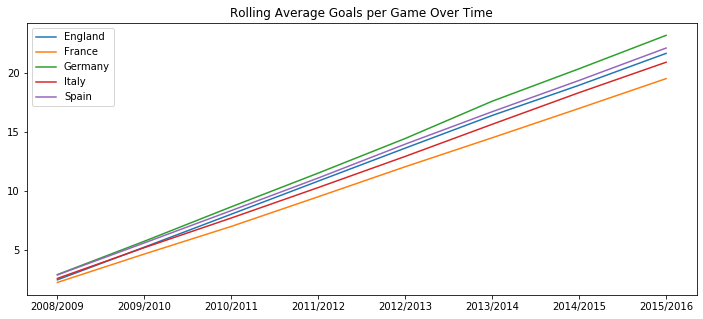

In [42]:
df = pd.DataFrame(index=np.sort(rolling_avg_by_season['season'].unique()), columns=rolling_avg_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(rolling_avg_by_season.loc[rolling_avg_by_season['country_name']=='Germany','roll_avg_goals'])
df.loc[:,'Spain']   = list(rolling_avg_by_season.loc[rolling_avg_by_season['country_name']=='Spain','roll_avg_goals'])
df.loc[:,'France']   = list(rolling_avg_by_season.loc[rolling_avg_by_season['country_name']=='France','roll_avg_goals'])
df.loc[:,'Italy']   = list(rolling_avg_by_season.loc[rolling_avg_by_season['country_name']=='Italy','roll_avg_goals'])
df.loc[:,'England']   = list(rolling_avg_by_season.loc[rolling_avg_by_season['country_name']=='England','roll_avg_goals'])

df.plot(figsize=(12,5),title='Rolling Average Goals per Game Over Time')

As seen from the above graph, all of the average goals per game follow a linear pattern as they are accumulated throughout various matches. We see that Germany leads as the primary country with the highest rolling average of accumulated goals over time. France lags last as the country with the least greatest rolling average of goals over time. 